In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tabulate import tabulate

features = pd.read_csv('../results/features/all_datasets_features_xg.csv')
features = features.dropna(axis=1)
feature_columns = features.columns[2:-3]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

feature_importance = gbm.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Forecasting Accuracy Loss')
plt.gca().invert_yaxis()
plt.show()

ValueError: could not convert string to float: 'ettm2'

(822, 27)

D:\Anaconda\envs\dart\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


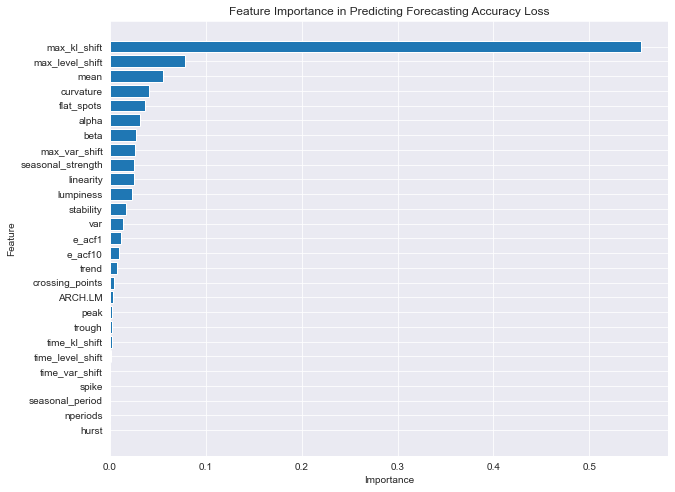

(206, 27)
RMSE 1.2900830259221143
R2 -0.17650046748363302


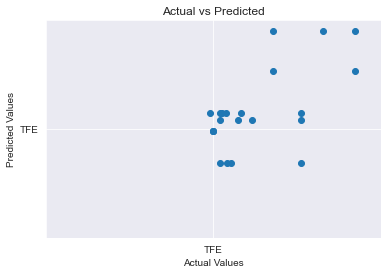

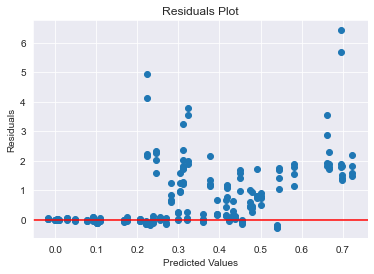

Training MSE: 0.05051208701271675
Training R^2: 0.9509032780473324


In [29]:
features = pd.read_csv('../results/features/all_datasets_features_diff.csv')
features = features.dropna(axis=1)
feature_columns = features.columns[2:-2]
N = features.shape[0]
X_train = features[feature_columns][:int(N*0.8)]
y_train = features[['TFE']][:int(N*0.8)]
display(X_train.shape)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

feature_importance = gbm.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Forecasting Accuracy Loss')
plt.gca().invert_yaxis()
plt.show()

X_test = features[feature_columns][int(N*0.8):]
y_test = features[['TFE']][int(N*0.8):]
print(X_test.shape)
y_pred = gbm.predict(X_test)

mse = mean_squared_error(y_test.values.squeeze(), y_pred)
rmse = np.sqrt(mse)
print('RMSE', rmse)
r2 = r2_score(y_test.values.squeeze(), y_pred)
print('R2', r2)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
residuals = y_test.values.squeeze() - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

train_predictions = gbm.predict(X_train)

# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

(1028, 27)

D:\Anaconda\envs\dart\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


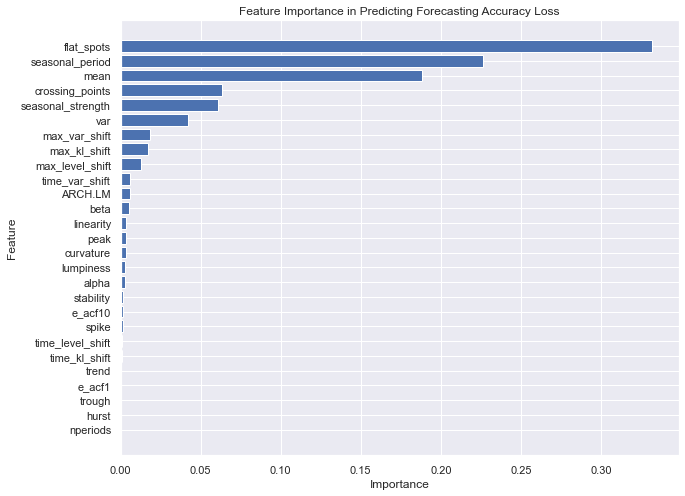

(1028, 27)
RMSE 0.19295404005197525
R2 0.9159119039769413


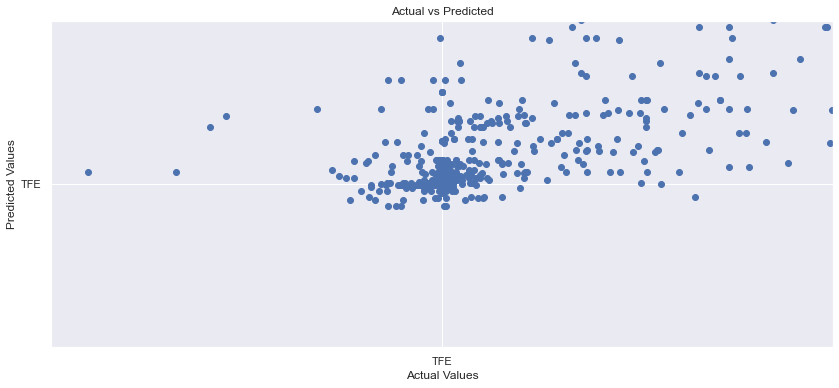

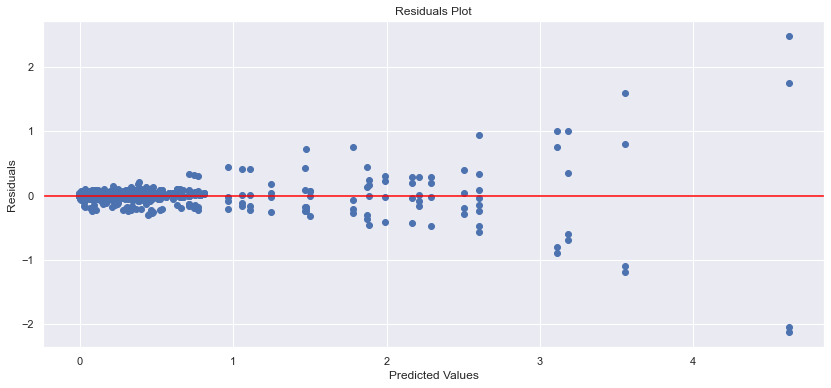

Training MSE: 0.19295404005197525
Training R^2: 0.9159119039769413


In [32]:
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")
palette = ['tab:blue', 'tab:green', 'tab:red']
hue_order = ['PMC', 'SZ', 'SWING']
sns.set(rc={"figure.figsize":(14, 6)})

features = pd.read_csv('../results/features/all_datasets_features.csv')
features = features.dropna(axis=1)
feature_columns = features.columns[2:-2]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
display(X_train.shape)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

feature_importance = gbm.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Time Series Feature')
plt.title('Feature Importance in Predicting Forecasting Accuracy Loss')
plt.gca().invert_yaxis()
plt.show()

X_test = features[feature_columns]
y_test = features[['TFE']]
print(X_test.shape)
y_pred = gbm.predict(X_test)

mse = mean_squared_error(y_test.values.squeeze(), y_pred)
rmse = np.sqrt(mse)
print('RMSE', rmse)
r2 = r2_score(y_test.values.squeeze(), y_pred)
print('R2', r2)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
residuals = y_test.values.squeeze() - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

train_predictions = gbm.predict(X_train)

# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

In [108]:
pd.read_csv('../results/features/all_datasets_features.csv')

,compression,eb,mean,var,max_kl_shift,time_kl_shift,max_level_shift,time_level_shift,max_var_shift,time_var_shift,...,spike,linearity,curvature,e_acf1,e_acf10,seasonal_strength,peak,trough,data,TFE
0,SZ,0.00,14.487689,5.129617e+01,4.339038,8106.0,1.260713,6864.0,1.115841,8062.0,...,3.294328e-10,-67.789699,27.281865,0.993917,7.548032,0.637575,57.0,31.0,ettm2,0.000000
1,SWING,0.00,14.487689,5.129617e+01,4.339038,8106.0,1.260713,6864.0,1.115841,8062.0,...,3.294328e-10,-67.789699,27.281865,0.993917,7.548032,0.637575,57.0,31.0,ettm2,0.000000
2,PMC,0.00,14.487689,5.129617e+01,4.339038,8106.0,1.260713,6864.0,1.115841,8062.0,...,3.294328e-10,-67.789699,27.281865,0.993917,7.548032,0.637575,57.0,31.0,ettm2,0.000000
3,SZ,0.01,14.487583,5.126219e+01,4.453332,8106.0,1.259974,6864.0,1.107009,8062.0,...,3.224037e-10,-67.922977,27.291752,0.992807,7.517633,0.639062,57.0,31.0,ettm2,0.004511
4,SZ,0.01,14.487583,5.126219e+01,4.453332,8106.0,1.259974,6864.0,1.107009,8062.0,...,3.224037e-10,-67.922977,27.291752,0.992807,7.517633,0.639062,57.0,31.0,ettm2,-0.000272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,SWING,0.65,5174.411636,4.563589e+05,716.713528,2983.0,8.346825,8686.0,22.945240,8660.0,...,1.813986e-09,-63.322846,-7.697834,0.940626,4.936768,0.000000,21.0,41.0,aus,2.366937
1024,SWING,0.80,4652.523827,3.302232e+06,253.996837,40265.0,3.212158,40219.0,2.646098,40195.0,...,1.860998e-11,-171.485525,70.134859,0.969033,5.978703,0.000002,11.0,34.0,aus,3.526289
1025,SWING,0.80,4652.523827,3.302232e+06,253.996837,40265.0,3.212158,40219.0,2.646098,40195.0,...,1.860998e-11,-171.485525,70.134859,0.969033,5.978703,0.000002,11.0,34.0,aus,4.191845
1026,SWING,0.80,4652.523827,3.302232e+06,253.996837,40265.0,3.212158,40219.0,2.646098,40195.0,...,1.860998e-11,-171.485525,70.134859,0.969033,5.978703,0.000002,11.0,34.0,aus,2.580953


In [109]:
import shap
np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features.csv')
features = features[features.TFE <= 0.7]
features = features.dropna(axis=1)
feature_columns = features.columns[2:-2]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
display(X_train.shape)
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_test)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=feature_importance_df.iloc[:-6], y='Importance', x='Feature', palette='viridis')
# plt.title("Top Features Based on SHAP Values", fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(l, fontsize=16)
    ax.set_ylabel(y, fontsize=16)

# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/shap_values.pdf')
plt.show()




(901, 42)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.270685, while the model output was 0.361979. If this difference is acceptable you can set check_additivity=False to disable this check.

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


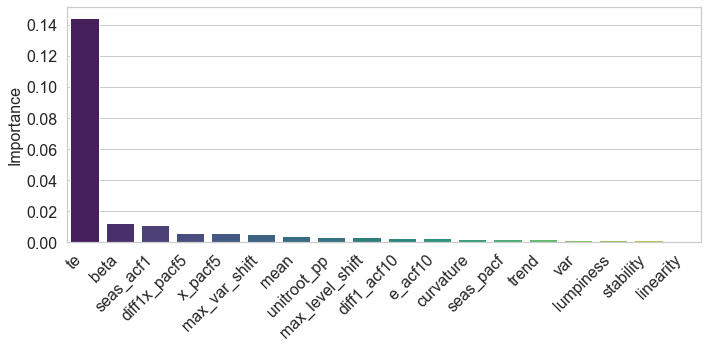

Training MSE: 0.05070008159202398
Training R^2: 0.9462209904960306


In [116]:
import shap
np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff.csv')
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)
# features = features.drop('seasonal_period', axis=1)
feature_columns = features.columns[2:-3]
feature_columns = feature_columns.tolist()+['te']
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=feature_importance_df.iloc[:-25], y='Importance', x='Feature', palette='viridis')
# plt.title("Top Features Based on SHAP Values", fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(l, fontsize=16)
    ax.set_ylabel(y, fontsize=16)

# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/shap_values.pdf')
plt.show()
train_predictions = gbm.predict(X_train)
feature_importance_df.to_csv('../results/features/features_shap_values.csv', index=False)
# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


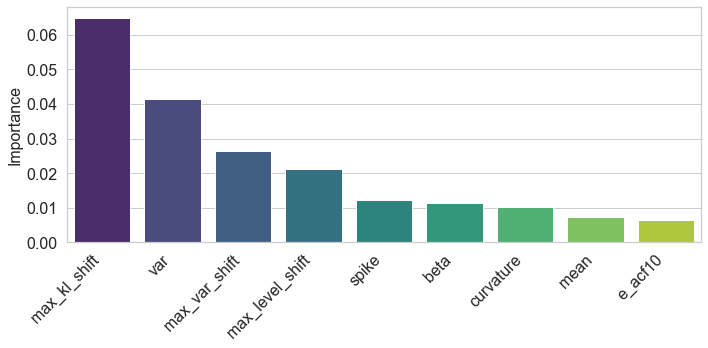

Training MSE: 0.0724924622367541
Training R^2: 0.8811004321323106


In [47]:
import shap
np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff_percentage_xg.csv')
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)
# features = features.drop('seasonal_period', axis=1)
feature_columns = features.columns[2:-4]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=feature_importance_df.iloc[:9], y='Importance', x='Feature', palette='viridis')
# plt.title("Top Features Based on SHAP Values", fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(l, fontsize=16)
    ax.set_ylabel(y, fontsize=16)

# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/shap_values.pdf')
plt.show()
train_predictions = gbm.predict(X_train)
feature_importance_df.to_csv('../results/features/features_shap_values_percentage_xg.csv', index=False)
# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

In [46]:
features

,compression,eb,mean,var,max_kl_shift,time_kl_shift,max_level_shift,time_level_shift,max_var_shift,time_var_shift,...,curvature,e_acf1,e_acf10,seasonal_strength,peak,trough,data,te,TFE,model
0,SZ,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,ettm2,0.000000,0.000000,DLINEAR
1,SZ,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,ettm2,0.000000,0.000000,NBEATS
2,SZ,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,ettm2,0.000000,0.000000,GRU
3,SZ,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,ettm2,0.000000,0.000000,INFORMER
4,SZ,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,ettm2,0.000000,0.000000,TRANSFORMER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,SWING,0.1,2.404164,-57.949959,3059.859165,-19.70428,88.68898,-27.656813,162.024887,-26.078118,...,-130.959316,1.197375,9.684963,-100.0,54.545455,61.764706,weather,0.144856,0.532521,INFORMER
1651,SWING,0.1,2.404164,-57.949959,3059.859165,-19.70428,88.68898,-27.656813,162.024887,-26.078118,...,-130.959316,1.197375,9.684963,-100.0,54.545455,61.764706,weather,0.144856,0.537705,DLINEAR
1652,SWING,0.1,2.404164,-57.949959,3059.859165,-19.70428,88.68898,-27.656813,162.024887,-26.078118,...,-130.959316,1.197375,9.684963,-100.0,54.545455,61.764706,weather,0.144856,0.450294,TRANSFORMER
1653,SWING,0.1,2.404164,-57.949959,3059.859165,-19.70428,88.68898,-27.656813,162.024887,-26.078118,...,-130.959316,1.197375,9.684963,-100.0,54.545455,61.764706,weather,0.144856,0.521232,NBEATS


(1657, 48)
(1574, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


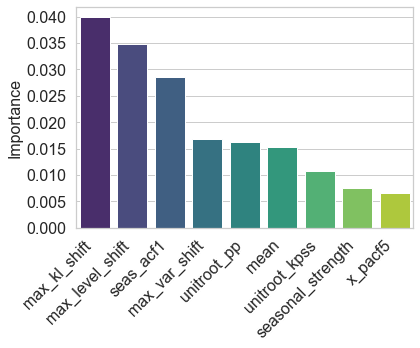

Training MSE: 0.06484592006571237
Training R^2: 0.8908553785175071


In [48]:
import shap
np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff_xg.csv')
print(features.shape)
c = (features.model == 'GRU') & (features.data == 'aus')
features = features[~c]
c = (features.model == 'GRU') & (features.data == 'solar')
features = features[~c]
print(features.shape)
features = features[features.eb < 0.8]
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)
# features = features.drop('seasonal_period', axis=1)
feature_columns = features.columns[2:-4]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 5))
ax = sns.barplot(data=feature_importance_df.iloc[:9], y='Importance', x='Feature', palette='viridis')
# plt.title("Top Features Based on SHAP Values", fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(l, fontsize=16)
    ax.set_ylabel(y, fontsize=16)

# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/shap_values_xg.pdf')
plt.show()
train_predictions = gbm.predict(X_train)
feature_importance_df.to_csv('../results/features/features_shap_values_xg.csv', index=False)
# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

(1657, 48)
(1574, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


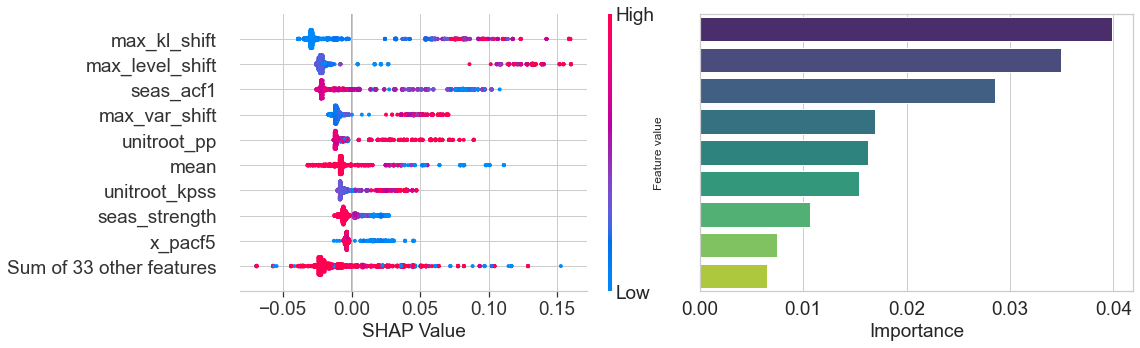

In [113]:
import shap
np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff_xg.csv')
print(features.shape)
c = (features.model == 'GRU') & (features.data == 'aus')
features = features[~c]
c = (features.model == 'GRU') & (features.data == 'solar')
features = features[~c]
print(features.shape)
features = features[features.eb < 0.8]
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)
features.rename({'seasonal_strength': 'seas_strength'}, axis=1, inplace=True)
# features = features.drop('seasonal_period', axis=1)
feature_columns = features.columns[2:-4]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

# Create subplots
fig, (ax_beeswarm, ax_bar) = plt.subplots(1, 2)

# Plot the barplot in the first subplot
sns.barplot(data=feature_importance_df.iloc[:9], x='Importance', y='Feature', palette='viridis', ax=ax_bar)
ax_bar.set_ylabel('')  # Hide y-axis label
ax_bar.set_yticks([])  # Hide y-axis ticks

shap_values = explainer(X_train)

# Plot the beeswarm in the second subplot
plt.sca(ax_beeswarm)
shap.plots.beeswarm(shap_values, show=False)
ax_beeswarm.set_ylabel('')  # Hide y-axis label for consistency

# Set axis labels and title
ax_bar.set_xlabel('Importance', fontsize=19)
ax_beeswarm.set_xlabel('SHAP Value', fontsize=19)

for ax in fig.axes:
    ax.tick_params(axis='x', labelsize=19)
    ax.tick_params(axis='y', labelsize=19)

fig.set_size_inches(16, 5, forward=True)
# Adjust layout
plt.tight_layout()
plt.savefig('../figures/combined_shap.pdf')
plt.show()

(1657, 48)
(1574, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


PermissionError: [Errno 13] Permission denied: '../figures/beeswarm.pdf'

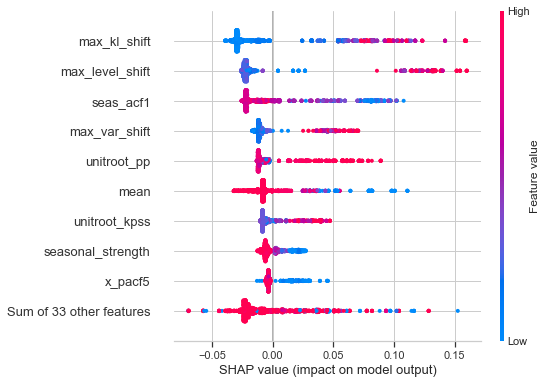

In [55]:
import shap


np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff_xg.csv')
print(features.shape)
c = (features.model == 'GRU') & (features.data == 'aus')
features = features[~c]
c = (features.model == 'GRU') & (features.data == 'solar')
features = features[~c]
print(features.shape)
features = features[features.eb < 0.8]
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)
# features = features.drop('seasonal_period', axis=1)
# features = features[features.data == dataset]
features.drop(['data'], axis=1, inplace=True)
feature_columns = features.columns[2:-3]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer(X_train)
# shap_values = explainer.shap_values(X_train)
shap.plots.beeswarm(shap_values, show=False)
plt.tight_layout()
plt.savefig('../figures/beeswarm.pdf')

# shap.dependence_plot("max_level_shift", shap_values.values, X_train, interaction_index="max_kl_shift")

(1657, 48)
(1574, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


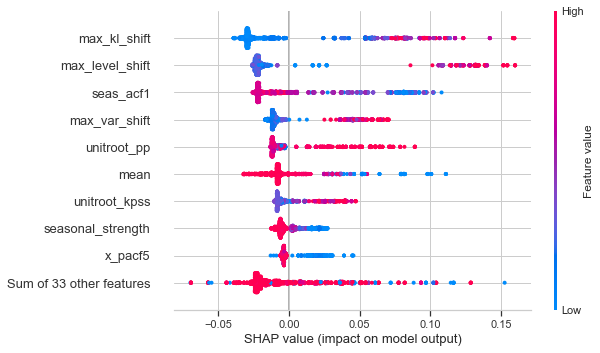

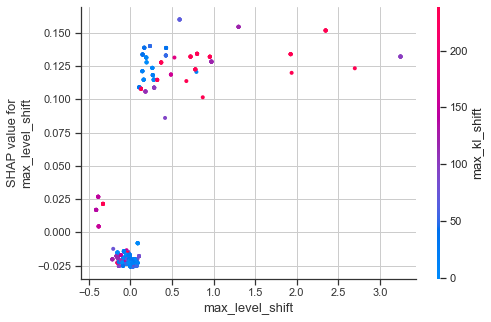

In [108]:
import shap


np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff_xg.csv')
print(features.shape)
c = (features.model == 'GRU') & (features.data == 'aus')
features = features[~c]
c = (features.model == 'GRU') & (features.data == 'solar')
features = features[~c]
print(features.shape)
features = features[features.eb < 0.8]
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)
# features = features.drop('seasonal_period', axis=1)
# features = features[features.data == dataset]
features.drop(['data'], axis=1, inplace=True)
feature_columns = features.columns[2:-3]
N = features.shape[0]
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer(X_train)
# shap_values = explainer.shap_values(X_train)
shap.plots.beeswarm(shap_values)

shap.dependence_plot("max_level_shift", shap_values.values, X_train, interaction_index="max_kl_shift")

(1662, 48)
(1578, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


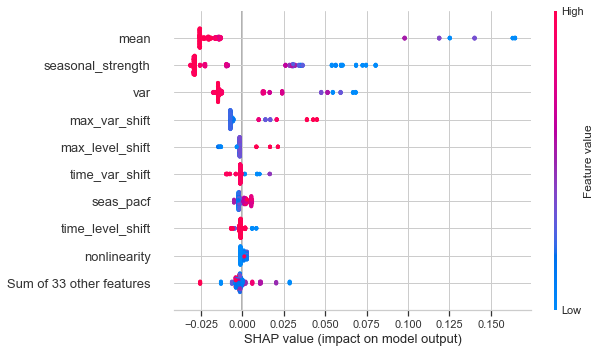

In [28]:
import shap

def shap_dataset(dataset):
    np.random.seed(42)
    features = pd.read_csv('../results/features/all_datasets_features_xg.csv')
    print(features.shape)
    c = (features.model == 'GRU') & (features.data == 'aus')
    features = features[~c]
    c = (features.model == 'GRU') & (features.data == 'solar')
    features = features[~c]
    print(features.shape)
    features = features[features.eb < 0.8]
    features = features[features.TFE <= 0.8]
    features = features.dropna(axis=1)
    # features = features.drop('seasonal_period', axis=1)
    features = features[features.data == dataset]
    features.drop(['data'], axis=1, inplace=True)
    feature_columns = features.columns[2:-3]
    N = features.shape[0]
    X_train = features[feature_columns]
    y_train = features[['TFE']]
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train, y_train)
    explainer = shap.TreeExplainer(gbm)
    shap_values = explainer(X_train)
    # shap_values = explainer.shap_values(X_train)
    shap.plots.beeswarm(shap_values)

shap_dataset('ettm1')

(1662, 48)
(1578, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


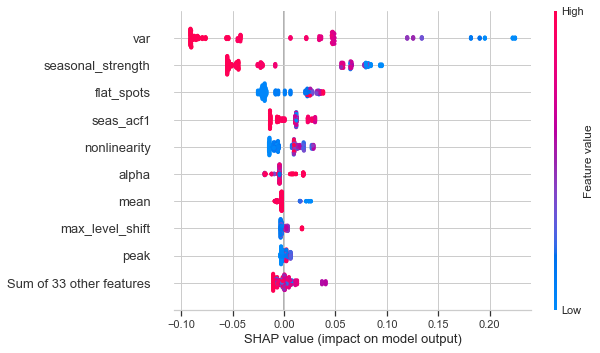

In [29]:
shap_dataset('ettm2')

(1662, 48)
(1578, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


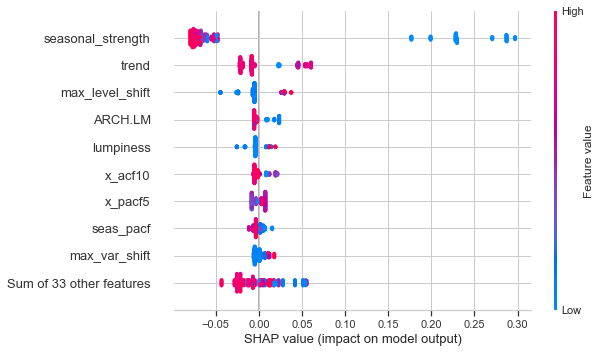

In [30]:
shap_dataset('weather')

(1662, 48)
(1578, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


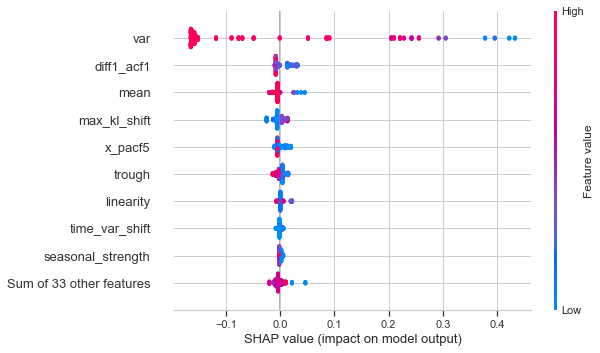

In [31]:
shap_dataset('wind')

(1662, 48)
(1578, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


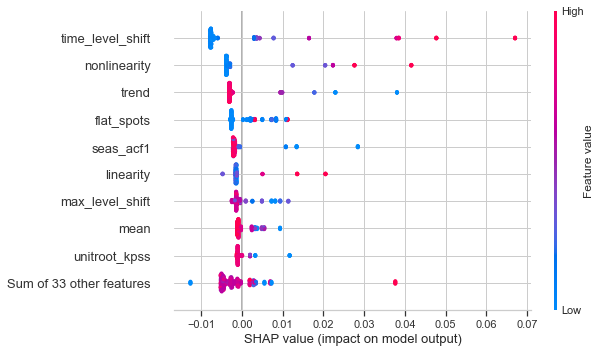

In [32]:
shap_dataset('solar')

(1657, 48)
(1574, 48)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


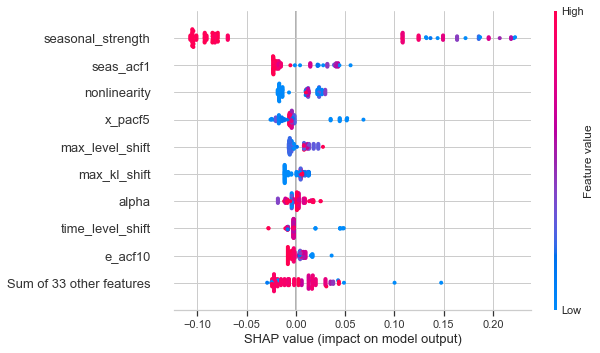

In [102]:
shap_dataset('aus')

In [83]:
feature_importance_df

,Feature,Importance
2,max_kl_shift,0.039881
4,max_level_shift,0.034904
14,seas_acf1,0.028513
6,max_var_shift,0.016890
30,unitroot_pp,0.016297
0,mean,0.015362
29,unitroot_kpss,0.010673
39,seasonal_strength,0.007429
24,x_pacf5,0.006515
1,var,0.006350


(27,)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


,Feature,Importance
24,seasonal_strength,0.038592
8,ARCH.LM,0.027085
2,max_kl_shift,0.025274
10,flat_spots,0.017040
1,var,0.013525
4,max_level_shift,0.010489
20,linearity,0.007947
14,lumpiness,0.006036
3,time_kl_shift,0.005658
6,max_var_shift,0.004981


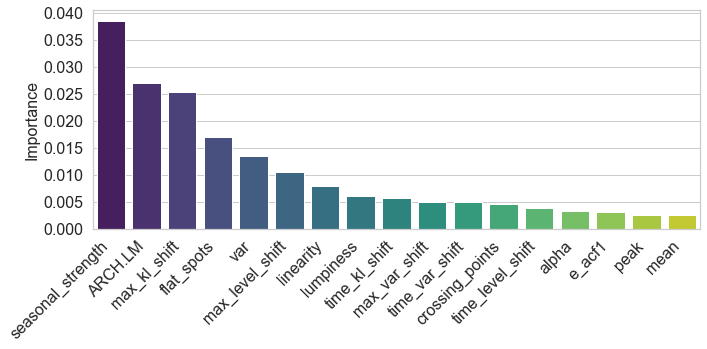

Training MSE: 0.04802701378083978
Training R^2: 0.8782703391149235


In [87]:
import shap

np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_xg.csv')
features = features[features.TFE <= 0.5]
features = features.dropna(axis=1)
# features = features.drop('seasonal_period', axis=1)
feature_columns = features.columns[2:-4]
N = features.shape[0]
print(feature_columns.shape)
X_train = features[feature_columns]
y_train = features[['TFE']]
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)
feature_importance = np.abs(shap_values).mean(axis=0)
feature_importance_df = pd.DataFrame(list(zip(X_train.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df)
# Plot using Seaborn with your provided settings
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['savefig.transparent'] = True
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=feature_importance_df.iloc[:-10], y='Importance', x='Feature', palette='viridis')
# plt.title("Top Features Based on SHAP Values", fontsize=16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    y = ax.get_ylabel()
    ax.set_xlabel(l, fontsize=16)
    ax.set_ylabel(y, fontsize=16)

# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.23)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/shap_values_percentage.pdf')
plt.show()
train_predictions = gbm.predict(X_train)
feature_importance_df.to_csv('../results/features/features_shap_values_percentage_xg.csv', index=False)
# Calculate metrics
mse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
r2_train = r2_score(y_train, train_predictions)

print(f"Training MSE: {mse_train}")
print(f"Training R^2: {r2_train}")

In [123]:
df = pd.read_csv('../results/features/all_datasets_features_diff_percentage_xg.csv')
print(df.shape)
c = (df.model == 'GRU') & (df.data == 'aus')
df = df[~c]
c = (df.model == 'GRU') & (df.data == 'solar')
df = df[~c]
df = df[df.TFE <= 0.05]
df[feature_importance_df.Feature.values[:5]] = df[feature_importance_df.Feature.values[:5]]
df = df[['compression', 'data'] + feature_importance_df.Feature.values[:5].tolist()]
df_mean = df.groupby(['data', 'compression']).mean().reset_index()

df_std = df.groupby(['data', 'compression']).std().reset_index()
compression_order = ['PMC', 'SWING', 'SZ']
dataset_order = ['ettm1', 'ettm2', 'solar', 'weather', 'aus', 'wind']

df_mean['compression'] = pd.Categorical(df_mean['compression'], categories=compression_order, ordered=True)
df_std['compression'] = pd.Categorical(df_std['compression'], categories=compression_order, ordered=True)
df_mean['data'] = pd.Categorical(df_mean['data'], categories=dataset_order, ordered=True)
df_std['data'] = pd.Categorical(df_std['data'], categories=dataset_order, ordered=True)

# Sort by the desired order
df_mean = df_mean.sort_values(['compression', 'data'])
df_std = df_std.sort_values(['compression', 'data'])


# Combine mean and std into one dataframe with rounded values
df_combined = df_mean.copy()
for column in df_mean.columns:
    if column not in ['compression', 'data']:
        df_combined[column] = df_mean[column].round(1).astype(str) + " (" + df_std[column].round(1).astype(str) + ")"

# Convert combined dataframe to LaTeX
latex_table = tabulate(df_combined, tablefmt="latex_booktabs", headers="keys", showindex=False)

print("Combined Table:\n", latex_table)

(1657, 48)
Combined Table:
 \begin{tabular}{lllllll}
\toprule
 data    & compression   & max\_kl\_shift   & max\_level\_shift   & seas\_acf1   & max\_var\_shift   & unitroot\_pp   \\
\midrule
 ettm1   & PMC           & 21.1 (25.6)    & 0.2 (0.3)         & 0.4 (0.5)   & 0.7 (1.4)       & -8.3 (9.2)    \\
 ettm2   & PMC           & 48.1 (84.2)    & 0.2 (0.3)         & 0.4 (0.6)   & 0.5 (0.7)       & -0.2 (0.4)    \\
 solar   & PMC           & 59.0 (52.8)    & 0.8 (0.9)         & 0.3 (0.2)   & 0.1 (0.2)       & -3.5 (3.4)    \\
 weather & PMC           & 112.7 (63.9)   & 1.1 (0.7)         & 0.3 (0.3)   & 1.9 (2.4)       & -4.7 (2.8)    \\
 aus     & PMC           & 28.5 (41.4)    & 0.3 (0.5)         & 0.4 (0.7)   & 0.4 (0.8)       & -1.9 (3.3)    \\
 wind    & PMC           & 64.0 (80.8)    & 0.1 (0.1)         & 0.2 (0.3)   & 0.8 (1.5)       & -5.9 (6.0)    \\
 ettm1   & SWING         & 1.8 (1.9)      & 1.0 (1.9)         & 0.5 (0.6)   & 2.5 (3.8)       & -9.1 (10.0)   \\
 ettm2   & SWING 

In [124]:
df_mean.groupby('compression').mean()

,max_kl_shift,max_level_shift,seas_acf1,max_var_shift,unitroot_pp
compression,,,,,
PMC,55.561299,0.448538,0.340039,0.735451,-4.077890
SWING,10.001821,1.018583,0.389315,1.500943,-5.607097
SZ,28.481882,0.567822,0.545976,1.362186,-10.658892


In [119]:
df_std.groupby('compression').mean()

,max_kl_shift,max_level_shift,seas_acf1,max_var_shift,unitroot_pp
compression,,,,,
PMC,76.945251,0.777570,0.687673,1.994022,5.574996
SWING,15.898998,1.679066,0.761527,3.731763,6.677280
SZ,77.593250,0.889956,0.939754,2.188766,20.085923


<AxesSubplot:xlabel='te', ylabel='seasonal_strength'>

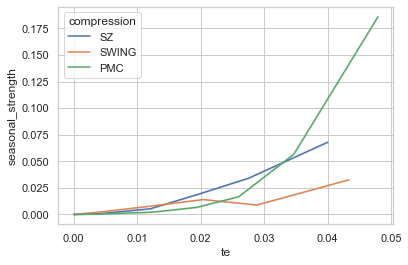

In [35]:
df = pd.read_csv('../results/features/all_datasets_features_diff_xg.csv')
c = (df.model == 'GRU') & (df.data == 'aus')
df = df[~c]
c = (df.model == 'GRU') & (df.data == 'solar')
df = df[~c]
df = df[df.data == 'aus']
df[feature_importance_df.Feature.values[:5]] = df[feature_importance_df.Feature.values[:5]].abs()
df = df[['compression', 'data', 'model', 'TFE', 'te', 'eb'] + feature_importance_df.Feature.values[:5].tolist()]
df = df[df.te < 0.05]
# df['comb'] = 1/5*df['max_kl_shift'] + 1/5*df['max_level_shift'] + 1/5*df['seas_acf1'] + 1/5*df['max_var_shift'] + 1/5*df['unitroot_pp']
sns.lineplot(data=df, x='te', y='seasonal_strength', hue='compression')

In [26]:
df

,compression,data,model,TFE,te,eb,seasonal_strength,ARCH.LM,max_kl_shift,flat_spots,var
288,SZ,ettm1,GRU,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
289,SZ,ettm1,DLINEAR,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
290,SZ,ettm1,NBEATS,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
291,SZ,ettm1,INFORMER,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
292,SZ,ettm1,TRANSFORMER,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,SWING,ettm1,TRANSFORMER,0.077735,0.046303,0.3,0.179388,0.006336,4.617377,94.0,0.653729
544,SWING,ettm1,NBEATS,0.096454,0.046303,0.3,0.179388,0.006336,4.617377,94.0,0.653729
545,SWING,ettm1,GRU,0.080627,0.046303,0.3,0.179388,0.006336,4.617377,94.0,0.653729
546,SWING,ettm1,ARIMA,0.191929,0.046303,0.3,0.179388,0.006336,4.617377,94.0,0.653729


In [100]:
display(df_mean)

,data,compression,max_kl_shift,max_level_shift,mean,max_var_shift,unitroot_pp
3,ettm1,PMC,4.864063,0.006491,5.697723e-09,0.010397,6.351702
6,ettm2,PMC,4.534636,0.006349,2.023904e-08,0.019845,0.958378
9,solar,PMC,8.958821,0.006514,5.962948e-10,0.002415,9.599968
12,weather,PMC,29.686001,0.029831,9.631190e-07,0.041753,3.212389
0,aus,PMC,18.713313,0.009642,1.833432e-06,0.018508,66.474020
15,wind,PMC,43.250979,0.005426,1.720967e-07,0.010007,7.728705
4,ettm1,SWING,0.708840,0.043200,4.394157e-02,0.045448,7.143680
7,ettm2,SWING,0.349255,0.013818,1.471714e-02,0.019182,5.921953
10,solar,SWING,0.874367,0.008827,1.977323e-01,0.041057,9.821930
13,weather,SWING,5.461688,0.070654,4.684909e-01,0.043708,11.023148


In [103]:
display(df_std)

,data,compression,max_kl_shift,max_level_shift,mean,max_var_shift,unitroot_pp
3,ettm1,PMC,5.213940,0.009358,5.797378e-09,0.016013,6.587349
6,ettm2,PMC,6.986619,0.013956,2.156406e-08,0.053047,2.826176
9,solar,PMC,7.989334,0.006798,5.145253e-10,0.003743,9.201161
12,weather,PMC,18.522554,0.033988,3.617702e-07,0.024346,2.179175
0,aus,PMC,19.609618,0.010983,1.813732e-06,0.022918,70.795614
15,wind,PMC,49.135073,0.013469,1.725697e-07,0.015762,7.241955
4,ettm1,SWING,1.281259,0.058705,5.240081e-02,0.063968,6.445127
7,ettm2,SWING,0.393350,0.014877,1.688913e-02,0.026395,5.241555
10,solar,SWING,2.215867,0.008159,1.883364e-01,0.063884,13.452200
13,weather,SWING,4.473236,0.031162,4.872339e-01,0.028766,7.844272


In [2]:
border1s = [0, 12 * 30 * 24 * 4 - 96, 12 * 30 * 24 * 4 + 4 * 30 * 24 * 4 - 96]
border2s = [12 * 30 * 24 * 4, 12 * 30 * 24 * 4 + 4 * 30 * 24 * 4, 12 * 30 * 24 * 4 + 8 * 30 * 24 * 4]
from utils.metrics import NRMSE, RMSE

In [34]:
mean_ma_rmse = 0
mean_res_rmse = 0

for eblc in ['pmc', 'swing', 'sz']:
    ettm2 = pd.read_parquet(f'../data/compressed/{eblc}/ettm2_output_data_points.parquet')
    ettm2_e10 = ettm2['OT-E0.1'][border1s[2]:border2s[2]] if 'sz' in eblc else ettm2['OT-E10'][border1s[2]:border2s[2]]
    ettm2_raw = ettm2['OT-R'][border1s[2]:border2s[2]]
    window_size = 25
    e10_moving_mean = ettm2_e10.rolling(window=window_size).mean()
    e10_res = ettm2_e10 - e10_moving_mean
    raw_moving_mean = ettm2_raw.rolling(window=window_size).mean()
    raw_res = ettm2_raw - raw_moving_mean
    mean_ma_rmse += RMSE(e10_moving_mean, raw_moving_mean)
    mean_res_rmse += RMSE(e10_res, raw_res)

print(round(mean_ma_rmse/3, 2), round(mean_res_rmse/3, 2))


0.45 0.8


In [49]:
mean_ma_rmse = 0
mean_res_rmse = 0

for eblc in ['pmc', 'swing', 'sz']:
    ettm1 = pd.read_parquet(f'../data/compressed/{eblc}/ettm1_output_data_points.parquet')
    ettm1_e10 = ettm1['OT-E0.1'][border1s[2]:border2s[2]] if 'sz' in eblc else ettm1['OT-E20'][border1s[2]:border2s[2]]
    ettm1_raw = ettm1['OT-R'][border1s[2]:border2s[2]]
    window_size = 25
    e10_moving_mean = ettm1_e10.rolling(window=window_size).mean()
    e10_res = ettm1_e10 - e10_moving_mean
    raw_moving_mean = ettm1_raw.rolling(window=window_size).mean()
    raw_res = ettm1_raw - raw_moving_mean
    mean_ma_rmse += NRMSE(e10_moving_mean, raw_moving_mean)
    mean_res_rmse += NRMSE(e10_res, raw_res)

print(round(mean_ma_rmse/3,2), round(mean_res_rmse/3, 2))


0.02 0.05


In [50]:
mean_ma_rmse = 0
mean_res_rmse = 0

for eblc in ['pmc', 'swing', 'sz']:
    weather = pd.read_parquet(f'../data/compressed/{eblc}/pweather_output_data_points.parquet')
    weather_e10 = weather['OT-E0.02'][border1s[2]:border2s[2]] if 'sz' in eblc else weather['OT-E2.0'][border1s[2]:border2s[2]]
    weather_raw = weather['OT-R'][border1s[2]:border2s[2]]
    window_size = 25
    e10_moving_mean = weather_e10.rolling(window=window_size).mean()
    e10_res = weather_e10 - e10_moving_mean
    raw_moving_mean = weather_raw.rolling(window=window_size).mean()
    raw_res = weather_raw - raw_moving_mean
    mean_ma_rmse += NRMSE(e10_moving_mean, raw_moving_mean)
    mean_res_rmse += NRMSE(e10_res, raw_res)

print(round(mean_ma_rmse/3,2), round(mean_res_rmse/3, 2))


0.04 0.07


<AxesSubplot:>

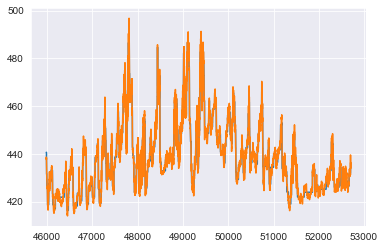

In [45]:
weather = pd.read_parquet(f'../data/compressed/pmc/pweather_output_data_points.parquet')
weather_e10 = weather['OT-E1.0'][border1s[2]:border2s[2]]
weather_raw = weather['OT-R'][border1s[2]:border2s[2]]
weather_e10.plot()
weather_raw.plot()

<AxesSubplot:>

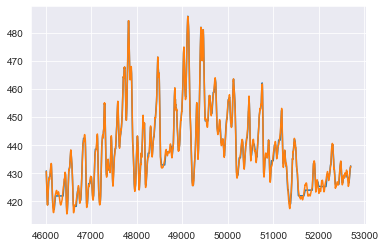

In [47]:
e10_moving_mean = weather_e10.rolling(window=window_size).mean()
raw_moving_mean = weather_raw.rolling(window=window_size).mean()
e10_moving_mean.plot()
raw_moving_mean.plot()

# Sensitivity Analysis

In [115]:
import shap

np.random.seed(42)
features = pd.read_csv('../results/features/all_datasets_features_diff_xg.csv')
print(features.shape)
c = (features.model == 'GRU') & (features.data == 'aus')
features = features[~c]
c = (features.model == 'GRU') & (features.data == 'solar')
features = features[~c]
print(features.shape)
features = features[features.eb < 0.8]
features = features[features.TFE <= 0.8]
features = features.dropna(axis=1)


N = features.shape[0]
X_train = features[['te', 'max_level_shift', 'seas_acf1', 'max_var_shift', 'unitroot_pp', 'unitroot_kpss', 'mean', 'seasonal_strength', 'x_pacf5']]
y_train = features[['TFE']]

import statsmodels.api as sm

# Adding a constant to the model (intercept)
X_train = sm.add_constant(X_train)

# Create a model and fit it
model = sm.OLS(y_train, X_train).fit()


print(model.summary())

# For a more direct view of the coefficients:
print("Coefficients:\n", model.params)


(1657, 48)
(1574, 48)
                            OLS Regression Results                            
Dep. Variable:                    TFE   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     543.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:34:19   Log-Likelihood:                 1310.5
No. Observations:                1334   AIC:                            -2601.
Df Residuals:                    1324   BIC:                            -2549.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

In [106]:
features

,compression,eb,mean,var,max_kl_shift,time_kl_shift,max_level_shift,time_level_shift,max_var_shift,time_var_shift,...,curvature,e_acf1,e_acf10,seasonal_strength,peak,trough,data,te,TFE,model
0,SZ,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ettm2,0.000000,0.000000,DLINEAR
1,SZ,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ettm2,0.000000,0.000000,NBEATS
2,SZ,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ettm2,0.000000,0.000000,GRU
3,SZ,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ettm2,0.000000,0.000000,INFORMER
4,SZ,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,ettm2,0.000000,0.000000,TRANSFORMER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,SWING,0.07,5.728076,-90.450156,119.277679,1244.0,0.974432,-1197.0,0.220882,-4021.0,...,-17.303695,-0.022547,-0.744483,-0.304561,18.0,-50.0,weather,0.111132,0.429247,GRU
1645,SWING,0.07,5.728076,-90.450156,119.277679,1244.0,0.974432,-1197.0,0.220882,-4021.0,...,-17.303695,-0.022547,-0.744483,-0.304561,18.0,-50.0,weather,0.111132,0.321627,TRANSFORMER
1646,SWING,0.07,5.728076,-90.450156,119.277679,1244.0,0.974432,-1197.0,0.220882,-4021.0,...,-17.303695,-0.022547,-0.744483,-0.304561,18.0,-50.0,weather,0.111132,0.388373,NBEATS
1647,SWING,0.07,5.728076,-90.450156,119.277679,1244.0,0.974432,-1197.0,0.220882,-4021.0,...,-17.303695,-0.022547,-0.744483,-0.304561,18.0,-50.0,weather,0.111132,0.396115,INFORMER
